# Analysis and Insights of Spotify Chart Data

In [9]:
import csv
import pprint
import pandas as pd
import math
import matplotlib.pyplot as plt
import analysis
import seaborn as sns

In [6]:
df = pd.read_csv('/Users/prithvivenkataswamy/Documents/Spotify-Exploration/data/usa/usa.csv')

In [3]:
unique_genres = analysis.count_unique_genres(df)
#pprint.pprint(unique_genres)

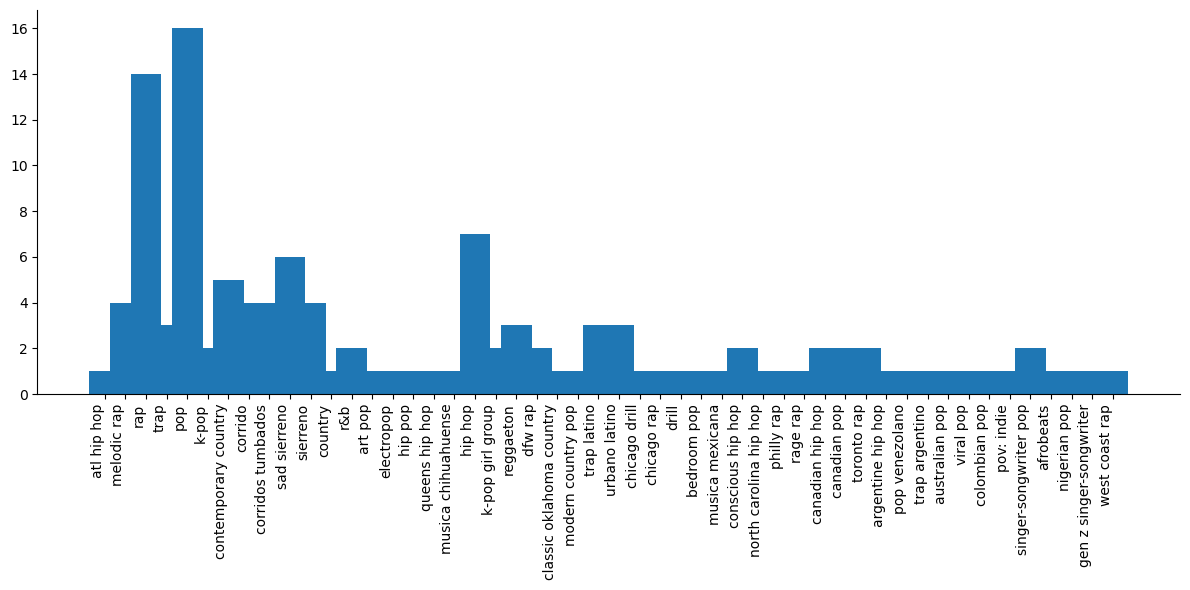

In [5]:
analysis.plot_bar_chart(unique_genres, bar_width = 1.5)

/var/folders/vy/jdf166552zlg6z0cwq4360900000gn/T/ipykernel_3858/3742515397.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


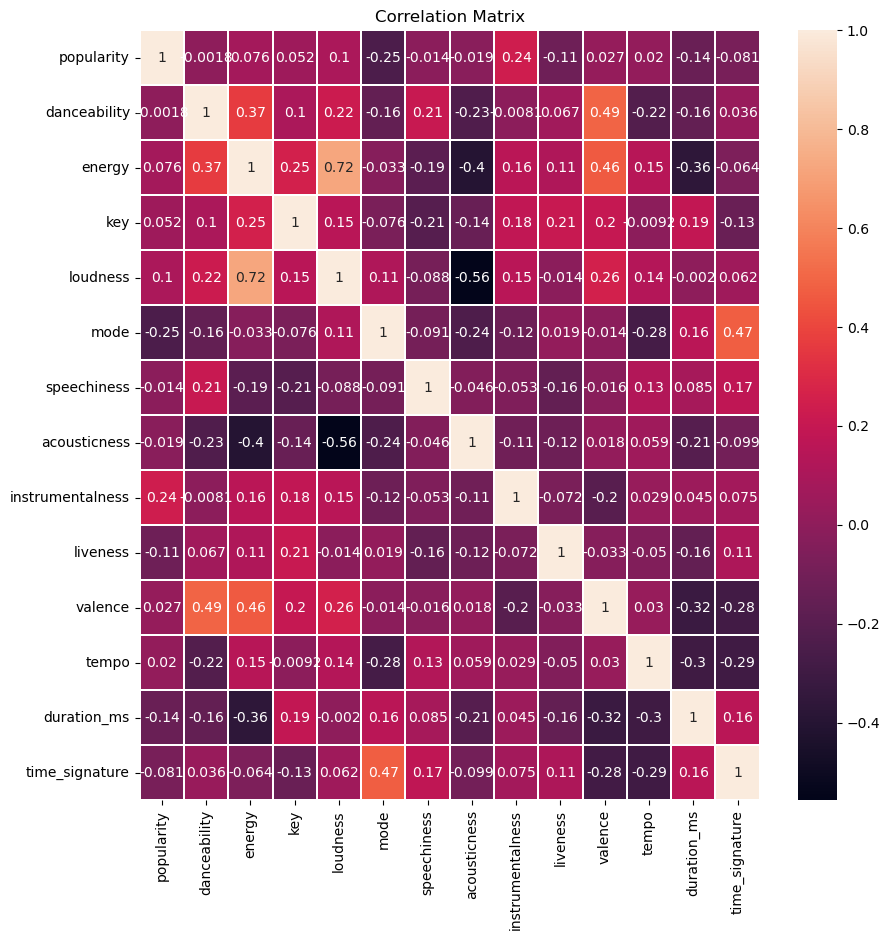

In [15]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 10))  # Optional: Adjust the figure size for better visualization
sns.heatmap(corr_matrix, annot=True,  linewidths=0.2)
plt.title('Correlation Matrix')
plt.show()

In [16]:
df.describe()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000
mean,92.220000,0.655860,0.649402,5.380000,-6.436840,0.540000,0.080954,0.261397,0.015581,0.170426,0.551018,128.578280,203207.54000,3.840000
std,4.268011,0.117548,0.155373,3.319024,2.389853,0.503457,0.078405,0.214663,0.090829,0.118553,0.246722,30.907163,53284.82269,0.370328
min,83.000000,0.369000,0.091100,0.000000,-17.665000,0.000000,0.026200,0.000307,0.000000,0.032200,0.096900,71.994000,109750.00000,3.000000
25%,89.250000,0.557250,0.572500,2.250000,-7.522250,0.000000,0.037550,0.077500,0.000000,0.096125,0.351000,101.773000,166079.00000,4.000000
50%,92.000000,0.662000,0.662500,5.000000,-5.761000,1.000000,0.051100,0.221000,0.000001,0.117000,0.560500,131.010500,196241.50000,4.000000
75%,95.000000,0.751750,0.752000,8.000000,-4.968000,1.000000,0.074450,0.411250,0.000031,0.230750,0.748000,143.659000,222157.50000,4.000000
max,100.000000,0.854000,0.866000,11.000000,-3.526000,1.000000,0.339000,0.959000,0.629000,0.602000,0.963000,203.759000,386907.00000,4.000000
